## Handwritten Digit Classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### read the handwritten digit dataset

In [2]:
from keras.datasets import mnist

In [3]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

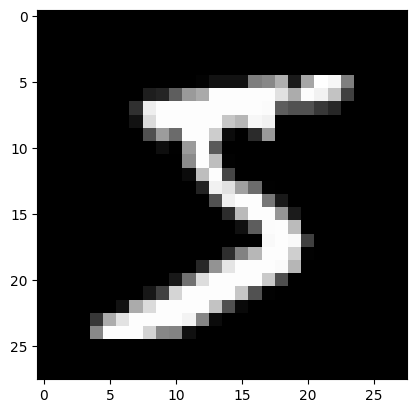

In [7]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')
plt.show()

### Seeing top 9 results from xtrain 

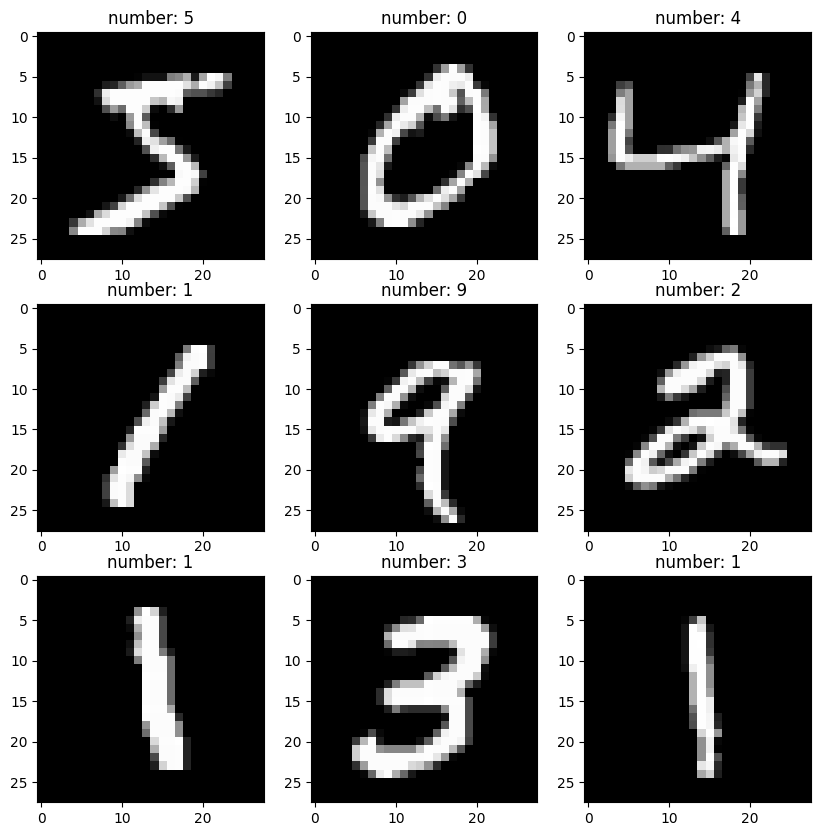

In [8]:
plt.figure(figsize=(10,10))
x=1
for i in range(9):
    plt.subplot(3,3,x)
    x=x+1
    plt.imshow(xtrain[i],cmap='gray')
    plt.title(f'number: {ytrain[i]}')
plt.show()

### Preprocessing the images

In [9]:
xtrain_scl=xtrain/255
xtest_scl=xtest/255

In [10]:
import numpy as np 
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Convert ytrain and ytest to categorical

In [11]:
from keras.utils import to_categorical
ytrain_cat=to_categorical(ytrain)
ytest_cat=to_categorical(ytest)

In [12]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [13]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

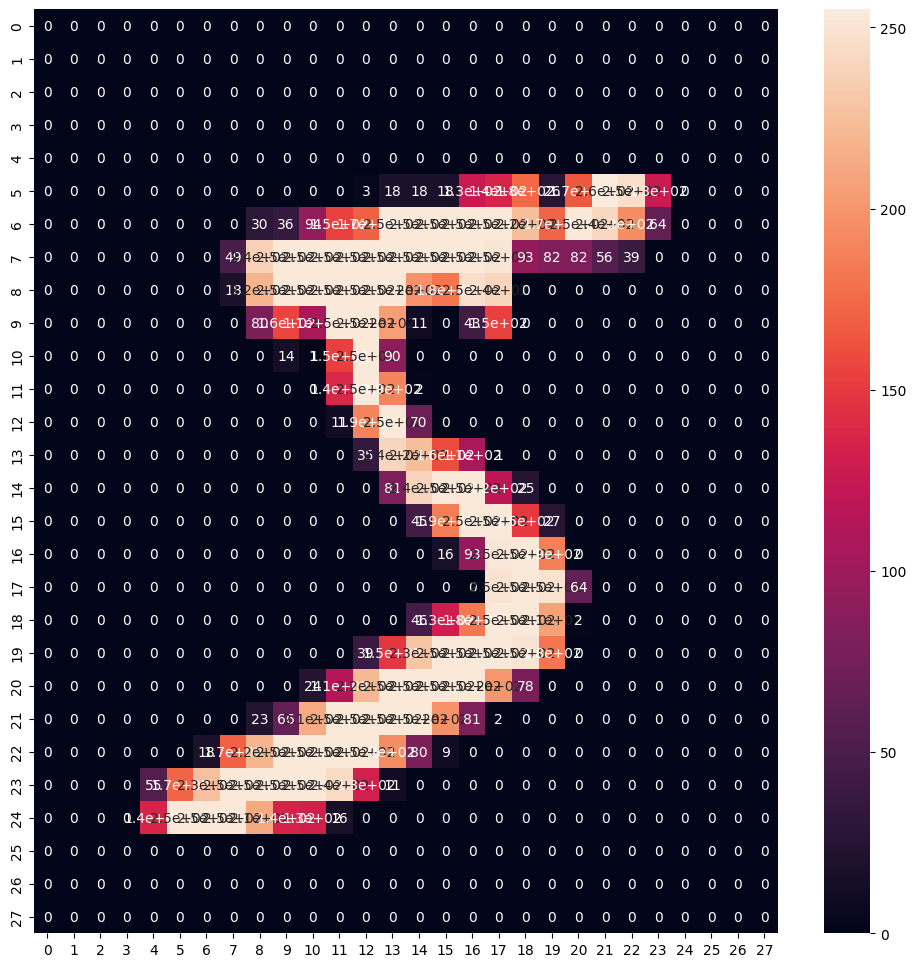

In [14]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(xtrain[0],annot=True)
plt.show()

### Building a cnn

## Batch normalization layer will act like standard scaler to each image

In [15]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPool2D,BatchNormalization,Dropout,Flatten,Dense

In [16]:
model=Sequential()
## Create convolution layer 1
model.add(Convolution2D(16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Create convolution layer 1
model.add(Convolution2D(16,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#create a flatten layer
model.add(Flatten())

# create a dense layer
model.add(Dense(256,activation='relu'))

# output layer
model.add(Dense(10,activation='softmax'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0

### Complie the model

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Fit the model

In [19]:
hist=model.fit(xtrain_scl,ytrain_cat,validation_split=0.2,epochs=5)

Epoch 1/5


1500/1500 [==============================] - 9s 5ms/step - loss: 0.1360 - accuracy: 0.9567 - val_loss: 0.0650 - val_accuracy: 0.9795
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0550 - accuracy: 0.9822 - val_loss: 0.0438 - val_accuracy: 0.9876
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0402 - accuracy: 0.9873 - val_loss: 0.0558 - val_accuracy: 0.9838
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0323 - accuracy: 0.9895 - val_loss: 0.0440 - val_accuracy: 0.9889
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0432 - val_accuracy: 0.9897


### PLot the learning curve

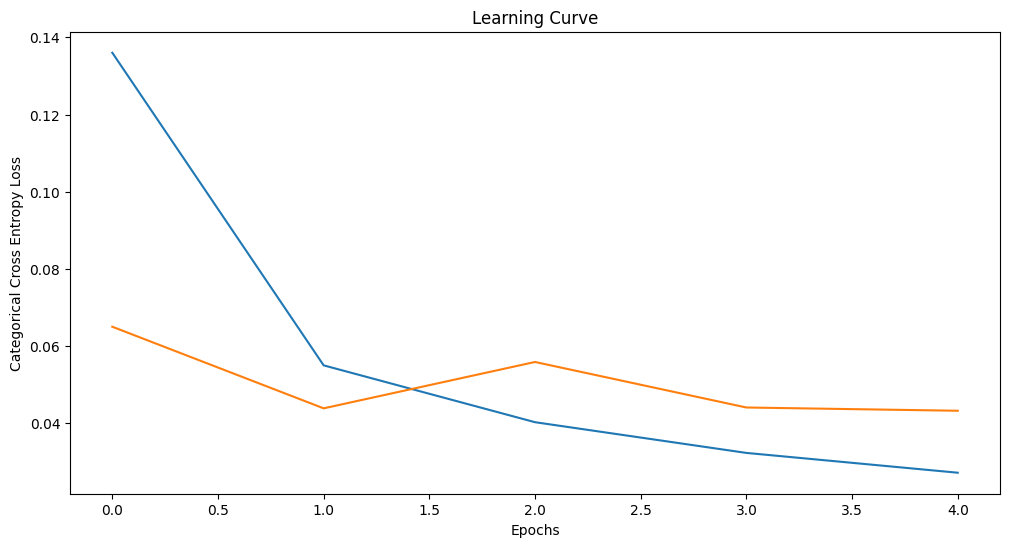

In [20]:
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'],label='Train_loss')
plt.plot(hist.history['val_loss'],label='Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy Loss')
plt.title('Learning Curve')
plt.show()

#### Evaluate model in train and test

In [21]:
model.evaluate(xtrain_scl,ytrain_cat)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0214 - accuracy: 0.9936


[0.02142740599811077, 0.9936333298683167]

In [22]:
model.evaluate(xtest_scl,ytest_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0366 - accuracy: 0.9895


[0.03659620136022568, 0.9894999861717224]

## Prediting results for train and test

In [23]:
yprob_tr=model.predict(xtrain_scl)
yprob_ts=model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [24]:
yprob_tr[0:5]

array([[6.75161094e-10, 3.41406903e-08, 6.03940293e-08, 4.67790663e-03,
        1.12225385e-08, 9.95231450e-01, 1.76453607e-08, 1.31653522e-07,
        3.27209273e-05, 5.76484817e-05],
       [1.00000000e+00, 1.06746563e-10, 1.01632584e-10, 6.09349431e-13,
        1.58491818e-12, 1.20043005e-12, 1.90675009e-09, 1.00632680e-09,
        2.98100346e-12, 1.27656441e-09],
       [2.86511097e-14, 3.29234496e-07, 3.40166853e-11, 9.40504119e-10,
        9.99994159e-01, 4.85355300e-13, 1.26763346e-12, 5.07171490e-06,
        1.10265963e-11, 4.06357628e-07],
       [1.84622682e-11, 9.99999881e-01, 2.39084950e-11, 4.62068583e-17,
        4.06852019e-09, 7.59377709e-14, 1.89177146e-12, 9.46456069e-08,
        8.14872735e-12, 1.35238654e-10],
       [4.82943980e-12, 3.20886229e-09, 2.51201673e-08, 6.21359035e-08,
        2.08870688e-06, 6.26018348e-09, 1.09110518e-12, 1.79708786e-05,
        1.96047358e-06, 9.99977946e-01]], dtype=float32)

### Predicting numbers

In [26]:
ypred_tr=np.argmax(yprob_tr,axis=1)
ypred_ts=np.argmax(yprob_ts,axis=1)

In [27]:
ypred_tr[0:5]

array([5, 0, 4, 1, 9], dtype=int64)

In [28]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [29]:
ypred_ts[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [31]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Create a confusion,matrix 

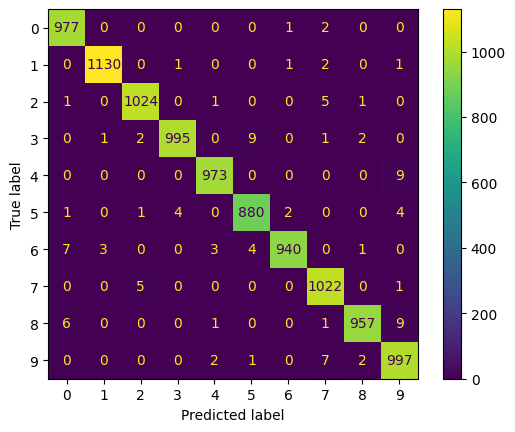

In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

### print classification report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Saving model for future use

In [34]:
model.save('Handwritten.keras')

## Loading the model

In [35]:
from keras.models import load_model

In [36]:
nn=load_model('Handwritten.keras')

In [37]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0